<a href="https://colab.research.google.com/github/nawidadkhah/Graph_Simulation/blob/main/Graph_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
def find_n2 (n1, d1):
  temp = n1 * d1
  q = []
  for i in range(2, int(temp/2)+1):
    if temp % i == 0:
      q.append(i)

  flag = False
  n2 = 0
  d2 = 0
  while flag == False:
   n2 = random.choice(q)
   if (n2 >= d1):
    flag = True
    d2 = int(temp / n2)
  return n2, d2

In [ ]:
d1 = random.randint(1, 10)
n1 = random.randint(10, 30)
n2, d2 = find_n2(n1, d1)

# d1 = 2
# n1 = 30
# n2 = 20
# d2 = 3

print("d1 : " + str(d1),
      "\nd2 : " + str(d2),
      "\nn1 : " + str(n1),
      "\nn2 : " + str(n2)
      )

nodes_a = []
nodes_b = []
for i in range(1, n1 + 1):
  nodes_a += [i for x in range(d1)]

for i in range(n1 + 1, n1 + n2 + 1):
  nodes_b += [i for x in range(d2)]

print(len(nodes_a))
print(len(nodes_b))
print(nodes_a)
print(nodes_b)

In [ ]:
nodes_check = []
check_edge = {}
G = nx.Graph()
while (len(nodes_a) != 0):

  choose_a_index = random.randint(0, len(nodes_a))
  choose_b_index = random.randint(0, len(nodes_b))

  remove_a = nodes_a[ choose_a_index - 1 ]
  remove_b = nodes_b[ choose_b_index - 1 ]

  if nodes_check.count(remove_a) != True:
    nodes_check.append(remove_a)
    G.add_node(remove_a)
  if nodes_check.count(remove_b) != True:
    nodes_check.append(remove_b)
    G.add_node(remove_b)

  if not G.has_edge(remove_a, remove_b):
    G.add_edge(remove_a, remove_b)
    nodes_a.pop( choose_a_index - 1 )
    nodes_b.pop( choose_b_index - 1 )


color_map = []

for node in G:
  if node < n1 +1:
        color_map.append('yellow')
  else:
        color_map.append('pink')

nx.draw(G, node_color=color_map, with_labels=True)

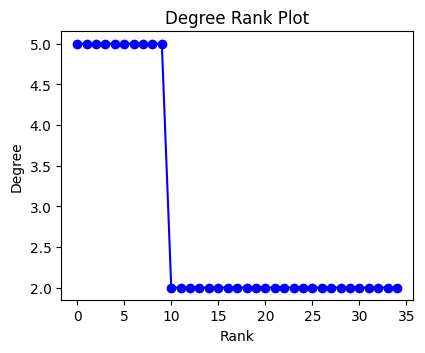

In [14]:

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")
fig.tight_layout()
plt.show()